# Tony Final Project: Analysis of Importance of Combat in Dungeons and Dragon

Dungeons and Dragon(DnD) is a table top role playing game that has a niche past time until recent. Drawing inspiration from various fantasy works, the game allows players to experience and immerse themselves in a thrilling tale and adventure. Part of this experiences offered in these adventures is combat, where a special set of rules are in play to allow these glorious moments to be carried out. 

Being the main component of growth for characters in the game, combat places a heavy importance in the game. This project looks to prove that such importance should be moved elseware as combat in Dungeons and Dragons is not challenging, is predictable, and a solved puzzle.

How CR works https://rpg.stackexchange.com/questions/45926/does-the-challenge-rating-of-a-monster-assume-a-party-or-a-single-pc

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
monsters = pd.read_csv('data/creatures.csv')
monsters


,name,cr,ac,hp,init,att_num,hit_mod,dam_avg
0,Aboleth,10.00,17,135,-1.09,3,9,12
1,Acolyte,0.25,10,9,0.10,1,2,2
2,Adult Black Dragon,14.00,19,195,2.14,3,11,14
3,Adult Blue Dracolich,17.00,19,225,0.10,3,12,15
4,Adult Blue Dragon,16.00,19,225,0.10,3,12,15
...,...,...,...,...,...,...,...,...
319,Young Green Dragon,8.00,18,136,1.12,3,6,15
320,Young Red Dragon,10.00,18,178,0.10,3,10,14
321,Young Silver Dragon,9.00,18,168,0.10,3,10,14
322,Young White Dragon,6.00,17,133,0.10,3,7,12


Lets do a basic scatter matricies to find any relationship

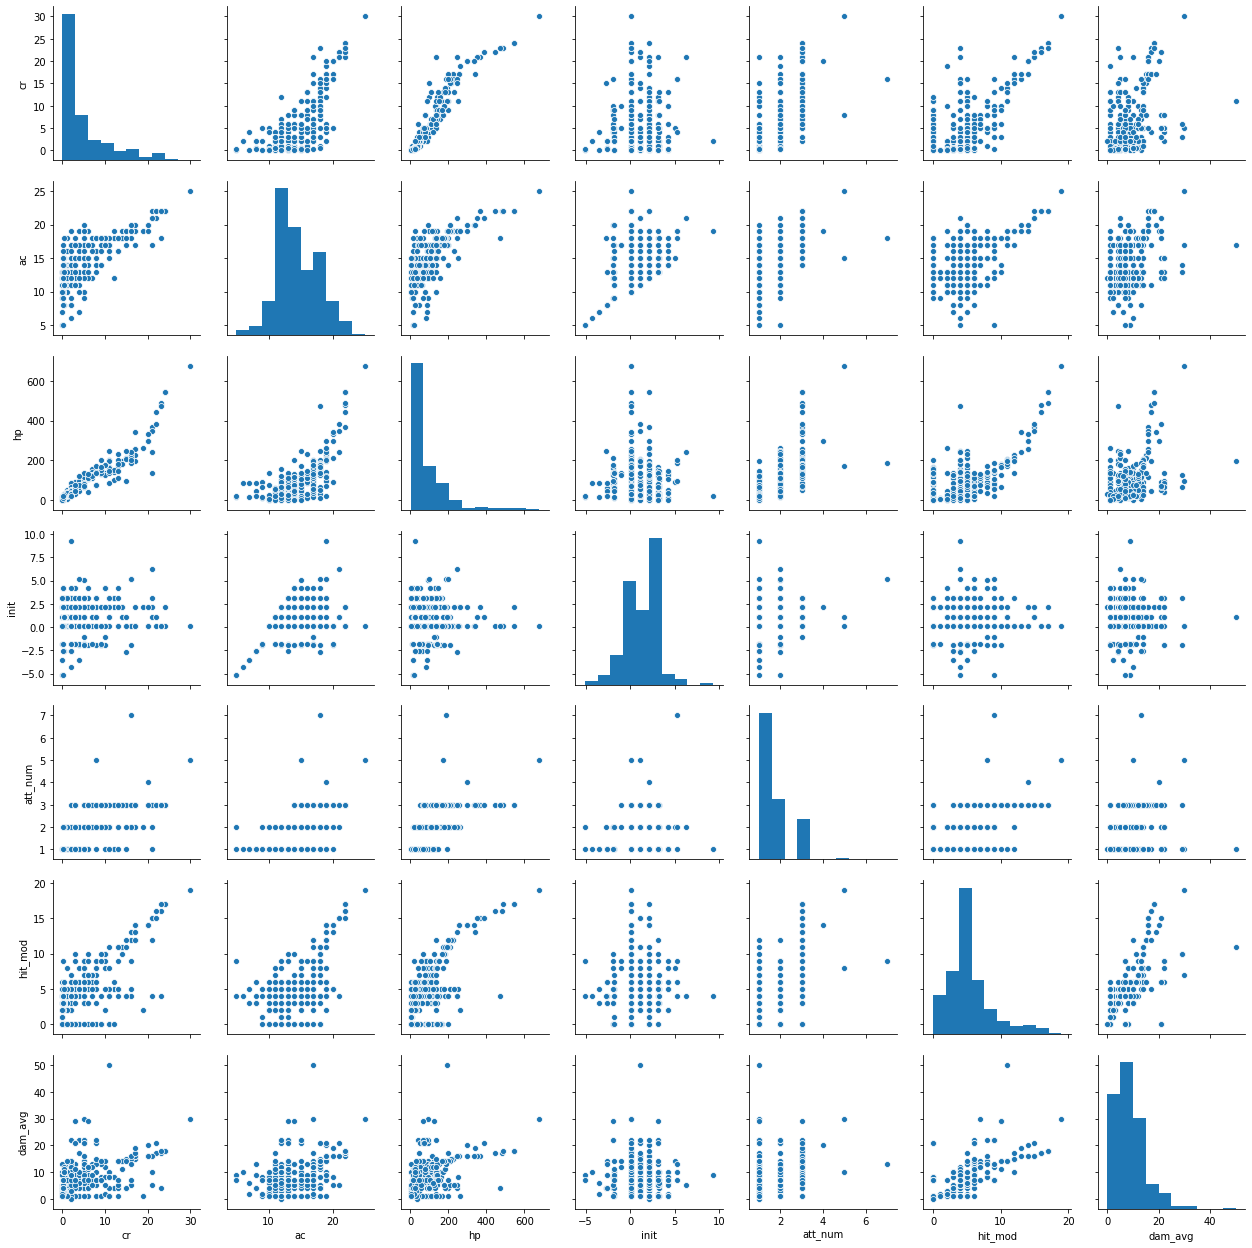

In [3]:
#Visualizations
import seaborn as sns
sns.pairplot(monsters)

This is a bit silly, what we want to measure is how each monster grows as its challenge rating grows

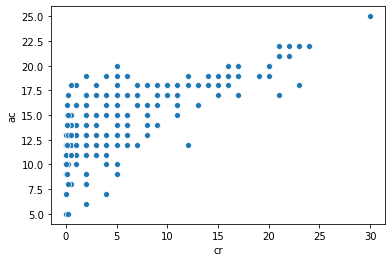

In [5]:
sns.scatterplot(data=monsters, x='cr', y='ac')

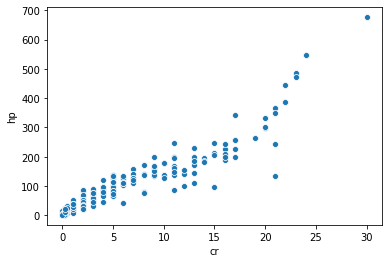

In [6]:
sns.scatterplot(data=monsters, x='cr', y='hp')

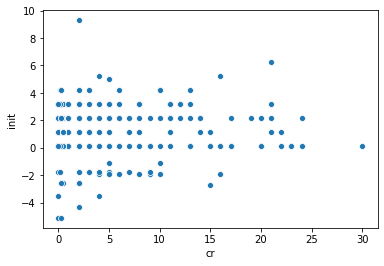

In [7]:
sns.scatterplot(data=monsters, x='cr', y='init')

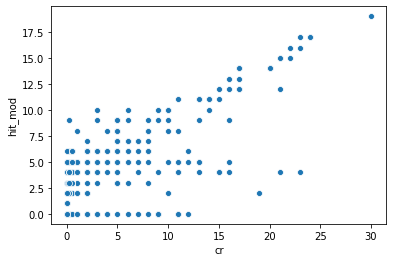

In [12]:
sns.scatterplot(data=monsters, x='cr', y='hit_mod')

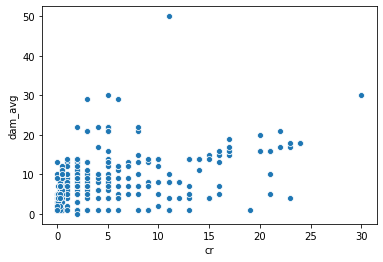

In [13]:
sns.scatterplot(data=monsters, x='cr', y='dam_avg')

We need to compare this data against the player's character data. My first plan is to compare how the character grows in level versus how the monsters grow in level

In [9]:
# Data Modeling
import statsmodels.formula.api as smf  # import the formula tools
model = smf.ols(data = monsters, formula = "cr ~ hp + ac + att_num + dam_avg")  # create the linear regression model object. 
                                               # "ols" stands for ordinary least squares.
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cr   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     733.6
Date:                Wed, 04 Dec 2019   Prob (F-statistic):          1.99e-159
Time:                        22:26:41   Log-Likelihood:                -659.43
No. Observations:                 324   AIC:                             1329.
Df Residuals:                     319   BIC:                             1348.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7763      0.583     -6.477      0.000      -4.923      -2.629
hp             0.0477      0.002     26.977      0.000       0.044       0.051
ac             0.2910      0.047      6.203      0.000       0.199       0.383
att_num        0.4001      0.169      2.372      0.018       0.068       0.732
dam_avg       -0.0320      0.019     -1.680      0.094      -0.070       0.005
==============================================================================
Omnibus:                      179.580   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1896.299
Skew:                           2.065   Prob(JB):                         0.00
Kurtosis:                      14.109   Cond. No.                         729.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Data Modeling
import statsmodels.formula.api as smf  # import the formula tools
model = smf.ols(data = monsters, formula = "cr ~ hp + ac + att_num")  # create the linear regression model object. 
                                               # "ols" stands for ordinary least squares.
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cr   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     971.6
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          2.39e-160
Time:                        20:41:22   Log-Likelihood:                -660.86
No. Observations:                 324   AIC:                             1330.
Df Residuals:                     320   BIC:                             1345.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9033      0.580     -6.732      0.000      -5.044      -2.763
hp             0.0469      0.002     27.467      0.000       0.044       0.050
ac             0.2850      0.047      6.076      0.000       0.193       0.377
att_num        0.4072      0.169      2.408      0.017       0.074       0.740
==============================================================================
Omnibus:                      183.051   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1960.004
Skew:                           2.114   Prob(JB):                         0.00
Kurtosis:                      14.283   Cond. No.                         722.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
new_monsters = pd.DataFrame(
    {
     'name': ['Tony', 'Toronto Bike', 'Toronto Car', 'American Car', 'Elvish Assassin', 'Controversial Leader of Nation'], 
     'hp': [10, 20, 100, 150, 50, 400], 
     'ac': [10, 14, 18, 20, 18, 22],
     'att_num': [2, 2, 1, 1, 6, 3], 
     'dam_avg': [4, 5, 10, 20, 10, 20],
    }
)
new_monsters['predicted CR'] = result.predict(new_monsters)
new_monsters

,name,hp,ac,att_num,dam_avg,predicted CR
0,Tony,10,10,2,4,0.230218
1,Toronto Bike,20,14,2,5,1.839252
2,Toronto Car,100,18,1,10,6.323717
3,American Car,150,20,1,20,9.238467
4,Elvish Assassin,50,18,6,10,6.014776
5,Controversial Leader of Nation,400,22,3,20,22.346334


In [69]:
# Data Cleaning and Manipulation
import random
import math

def rollD20():
    return  random.randint(1,20)

def doesItHit(ac, hit_mod):
    hit_roll = hit_mod + rollD20()
#     print('Hit roll was', hit_roll)
    if hit_roll >= ac:
        return True
    else:
        return False
    
def calculatePlayerAttacks(max_hp, current_hp, number_attacks):
    player_hp = max_hp / 4;
#     print(player_hp)
    player_attacks = number_attacks / 4;
#     print(player_attacks)
#     print(max_hp/player_hp)
    result = math.ceil(current_hp/player_hp) * player_attacks
#     print(result)
    return int(result);
    

def combat(creature, party):
    max_hp = party['hp']
    party_hp = party['hp']
    party_dmg = party['dam_avg']
    party_att = party['att_num']
    party_hitmod = party['hit_mod']
    party_ac = party['ac']
    party_init = rollD20()

    
    monster_hp = creature['hp']
    monster_dmg = creature['dam_avg']
    monster_att = creature['att_num']
    monster_hitmod = creature['hit_mod']
    monster_ac = creature['ac']
    monster_init = rollD20() + creature['init']
    
    if party_init >= monster_init:
        init_flag = True;
    else:
        init_flag = False;
    
    while party_hp > 0:
        if init_flag == True :
            party_attacks = calculatePlayerAttacks(max_hp, party_hp, party_att);
#             print("party attacks with" , party_attacks, 'attacks')
            # party gets to attack first
            for x in range(0, party_attacks):
                if doesItHit(monster_ac, party_hitmod):
                    monster_hp = monster_hp - party_dmg
#                     print("monster hurt at", monster_hp)
        else:    
            # monster gets to attack first
#             print("monster attacks")
            for x in range(0, monster_att):
                if doesItHit(party_ac, monster_hitmod):
                    party_hp = party_hp - (monster_dmg)
#                     print("party hurt at", party_hp)
            
        if monster_hp <= 0:
            return True
        elif party_hp <= 0:
            return False
        
        if init_flag == True :
#             print("monster attacks")
            for x in range(0, monster_att):
                if doesItHit(party_ac, monster_hitmod):
                    party_hp = party_hp - monster_dmg 
#                     print("party hurt at", party_hp)
        else:
            party_attacks = calculatePlayerAttacks(max_hp, party_hp, party_att);
#             print("party attacks with" , party_attacks, 'attacks')
            for x in range(0, party_attacks):
                if doesItHit(monster_ac, party_hitmod):
                    monster_hp = monster_hp - party_dmg
#                     print("monster hurt at", monster_hp)
        if monster_hp <= 0:
            return True
        
    return False

tonyparty = {
    'hp': 48,
    'dmg_avg': 7,
    'att_num': 4,
    'hit_mod': 5,
    'ac': 18,
    'init': 0
}

pooopypants = {
    'hp': 90,
    'dmg_avg': 12,
    'att_num': 1,
    'hit_mod': 15,
    'ac': 10,
    'init': 1,
}
# monster_dict = monsters.to_dict('index')
# fighter_dict = fighters.to_dict('index')
# for x in range(0, 100):
#     print(combat(monster_dict[19], fighter_dict[9]))
# print(combat(monster_dict[3], fighter_dict[10]1))
    

In [12]:
fighters = pd.read_csv('data/fighters.csv')
fighters

,name,cr,ac,hp,init,att_num,hit_mod,dam_avg
0,Party 1,1,18,48,0,4,5,7
1,Party 2,2,18,80,0,4,5,7
2,Party 3,3,18,112,0,4,5,7
3,Party 4,4,18,144,0,4,5,7
4,Party 5,5,18,176,0,8,6,7
5,Party 6,6,19,212,0,8,7,8
6,Party 7,7,19,248,0,8,7,8
7,Party 8,8,19,284,0,8,7,8
8,Party 9,9,19,320,0,8,8,8
9,Party 10,10,19,356,0,8,8,8


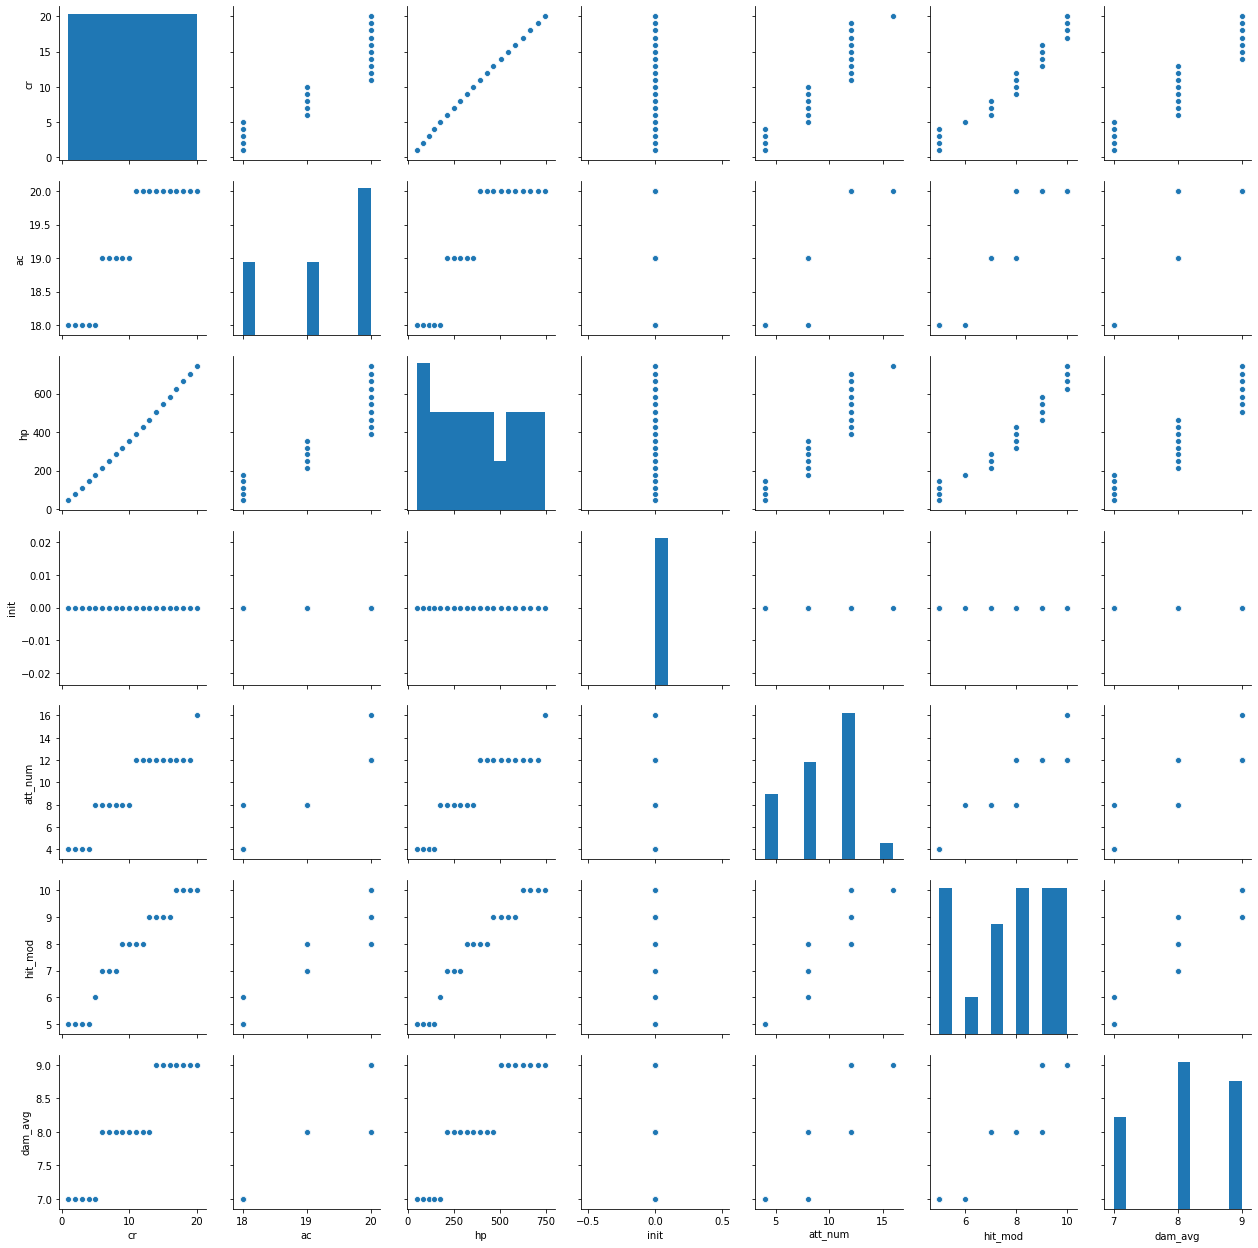

In [13]:
#Visualizations
sns.pairplot(fighters)

In [36]:
dict_fighters = fighters.to_dict('index')
dict_monsters = monsters.to_dict('index')
party_list = [];
enemy_list = [];
cr_list = [];
wins_list = [];
losses_list = [];
close_list = [];

for party_index in dict_fighters:
    current_party = dict_fighters[party_index]
    for monster_index in dict_monsters:
        current_monster = dict_monsters[monster_index]
        win_count = 0
        lose_count = 0
        for x in range(100):
            if combat(current_monster, current_party):
#                 print(current_party['name'] + " fought " + current_monster['name'] + "and won")
                win_count += 1
            else:
#                 print(current_party['name'] + " fought " + current_monster['name'] + "and lost")
                lose_count += 1
#         print(current_party['name'] + " won " + str(win_count) + " times and lost " + str(lose_count) + " times against "+ current_monster['name'])
        party_list.append(current_party['name']);
        enemy_list.append(current_monster['name']);
        cr_list.append(current_monster['cr']);
        wins_list.append(win_count);
        losses_list.append(lose_count);
        if (win_count > 30 and win_count < 70):
#             print("It was close between " + current_party['name'] + " and  " + current_monster['name'])
            close_list.append(1);
        else :
#             print("It was not close between " + current_party['name'] + " and  " + current_monster['name'])
            close_list.append(0);
            
combat_results = pd.DataFrame(
    {
     'party': party_list, 
     'enemy': enemy_list, 
     'cr': cr_list, 
     'wins': wins_list,
     'losses': losses_list, 
     'close': close_list,
    }
)



In [60]:
combat_results.sort_values(by=['close'], ascending=False)
# combat_results.loc[combat_results['close'] == 1]
# combat_results.groupby(['party']).mean()

,party,enemy,cr,wins,losses,close
853,Party 3,Nalfeshnee,13.00,47,53,1
2505,Party 8,Remorhaz,11.00,47,53,1
1131,Party 4,Gynosphinx,11.00,37,63,1
985,Party 4,Air Elemental,5.00,48,52,1
1136,Party 4,Hezrou,8.00,64,36,1
...,...,...,...,...,...,...
2194,Party 7,Sea Hag,2.00,100,0,0
2193,Party 7,Scout,0.50,100,0,0
2192,Party 7,Scorpion,0.00,100,0,0
2191,Party 7,Satyr,0.50,100,0,0


In [40]:
combat_results_level_one = combat_results.loc[combat_results['party'] == "Party 1"]
combat_results_level_one

,party,enemy,cr,wins,losses,close
0,Party 1,Aboleth,10.00,0,100,0
1,Party 1,Acolyte,0.25,100,0,0
2,Party 1,Adult Black Dragon,14.00,0,100,0
3,Party 1,Adult Blue Dracolich,17.00,0,100,0
4,Party 1,Adult Blue Dragon,16.00,0,100,0
...,...,...,...,...,...,...
319,Party 1,Young Green Dragon,8.00,0,100,0
320,Party 1,Young Red Dragon,10.00,0,100,0
321,Party 1,Young Silver Dragon,9.00,0,100,0
322,Party 1,Young White Dragon,6.00,0,100,0


In [44]:
# Data Modeling
X = combat_results_level_one['cr'].values.reshape(-1,1)  ## Annoying hack you have to do when you have one independent variable
y = combat_results_level_one['close']
combat_results_level_one_model = linear_model.LogisticRegression(solver='liblinear')
combat_results_level_one_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
Xnew = np.arange(0, 20, 0.5).reshape(-1,1)
combat_results_level_one_model.predict(Xnew)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
beta_0 = combat_results_level_one_model.intercept_[0]
print(beta_0)
beta_1 = combat_results_level_one_model.coef_[0][0]
print(beta_1)

-2.8367568339411546
-0.031918650090878034


In [49]:
def predict_probability(x):
    return 1/(1 + exp(-(beta_0 + beta_1 * x)))
[predict_probability(x) for x in Xnew]

[array([0.05536992]),
 array([0.05454109]),
 array([0.05372395]),
 array([0.05291837]),
 array([0.0521242]),
 array([0.05134131]),
 array([0.05056954]),
 array([0.04980877]),
 array([0.04905886]),
 array([0.04831966]),
 array([0.04759104]),
 array([0.04687286]),
 array([0.046165]),
 array([0.04546732]),
 array([0.04477969]),
 array([0.04410197]),
 array([0.04343405]),
 array([0.04277579]),
 array([0.04212707]),
 array([0.04148776]),
 array([0.04085773]),
 array([0.04023687]),
 array([0.03962506]),
 array([0.03902217]),
 array([0.03842809]),
 array([0.0378427]),
 array([0.03726587]),
 array([0.03669751]),
 array([0.03613749]),
 array([0.03558569]),
 array([0.03504202]),
 array([0.03450636]),
 array([0.03397859]),
 array([0.03345862]),
 array([0.03294634]),
 array([0.03244163]),
 array([0.0319444]),
 array([0.03145455]),
 array([0.03097196]),
 array([0.03049655])]

In [50]:
combat_results_level_one_model.predict_proba(Xnew)

array([[0.94463008, 0.05536992],
       [0.94545891, 0.05454109],
       [0.94627605, 0.05372395],
       [0.94708163, 0.05291837],
       [0.9478758 , 0.0521242 ],
       [0.94865869, 0.05134131],
       [0.94943046, 0.05056954],
       [0.95019123, 0.04980877],
       [0.95094114, 0.04905886],
       [0.95168034, 0.04831966],
       [0.95240896, 0.04759104],
       [0.95312714, 0.04687286],
       [0.953835  , 0.046165  ],
       [0.95453268, 0.04546732],
       [0.95522031, 0.04477969],
       [0.95589803, 0.04410197],
       [0.95656595, 0.04343405],
       [0.95722421, 0.04277579],
       [0.95787293, 0.04212707],
       [0.95851224, 0.04148776],
       [0.95914227, 0.04085773],
       [0.95976313, 0.04023687],
       [0.96037494, 0.03962506],
       [0.96097783, 0.03902217],
       [0.96157191, 0.03842809],
       [0.9621573 , 0.0378427 ],
       [0.96273413, 0.03726587],
       [0.96330249, 0.03669751],
       [0.96386251, 0.03613749],
       [0.96441431, 0.03558569],
       [0.

In [64]:
combat_results_level_one_model.predict_proba(Xnew)[:,1]

array([0.05536992, 0.05454109, 0.05372395, 0.05291837, 0.0521242 ,
       0.05134131, 0.05056954, 0.04980877, 0.04905886, 0.04831966,
       0.04759104, 0.04687286, 0.046165  , 0.04546732, 0.04477969,
       0.04410197, 0.04343405, 0.04277579, 0.04212707, 0.04148776,
       0.04085773, 0.04023687, 0.03962506, 0.03902217, 0.03842809,
       0.0378427 , 0.03726587, 0.03669751, 0.03613749, 0.03558569,
       0.03504202, 0.03450636, 0.03397859, 0.03345862, 0.03294634,
       0.03244163, 0.0319444 , 0.03145455, 0.03097196, 0.03049655])

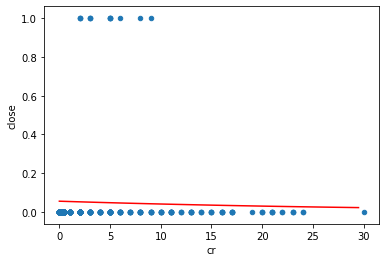

In [66]:
#Visualizations
bt_data = combat_results_level_one[['cr', 'close']]
bt_data.plot.scatter("cr", "close")

# plot the predicted probability:
plt.plot(np.arange(0,30, .5), combat_results_level_one_model.predict_proba(np.arange(0,30,.5).reshape(-1,1))[:,1], color = 'red')

In [73]:
# Second Idea
# Data Modeling
dict_fighters = fighters.to_dict('index')
dict_monsters = monsters.to_dict('index')
party_list = [];
enemy_list = [];
cr_list = [];
wins_list = [];
losses_list = [];
overall_win_list = [];

for party_index in dict_fighters:
    current_party = dict_fighters[party_index]
    for monster_index in dict_monsters:
        current_monster = dict_monsters[monster_index]
        win_count = 0
        lose_count = 0
        for x in range(100):
            if combat(current_monster, current_party):
#                 print(current_party['name'] + " fought " + current_monster['name'] + "and won")
                win_count += 1
            else:
#                 print(current_party['name'] + " fought " + current_monster['name'] + "and lost")
                lose_count += 1
#         print(current_party['name'] + " won " + str(win_count) + " times and lost " + str(lose_count) + " times against "+ current_monster['name'])
        party_list.append(current_party['name']);
        enemy_list.append(current_monster['name']);
        cr_list.append(current_monster['cr']);
        wins_list.append(win_count);
        losses_list.append(lose_count);
        if (win_count > 50 ):
#             print("It was close between " + current_party['name'] + " and  " + current_monster['name'])
            overall_win_list.append(1);
        else :
#             print("It was not close between " + current_party['name'] + " and  " + current_monster['name'])
            overall_win_list.append(0);
            
combat_results_2 = pd.DataFrame(
    {
     'party': party_list, 
     'enemy': enemy_list, 
     'cr': cr_list, 
     'wins': wins_list,
     'losses': losses_list, 
     'overall_win': overall_win_list,
    }
)



In [72]:
combat_results_2

,party,enemy,cr,wins,losses,overall_win
0,Party 1,Aboleth,10.00,0,100,0
1,Party 1,Acolyte,0.25,100,0,1
2,Party 1,Adult Black Dragon,14.00,0,100,0
3,Party 1,Adult Blue Dracolich,17.00,0,100,0
4,Party 1,Adult Blue Dragon,16.00,0,100,0
...,...,...,...,...,...,...
6475,Party 20,Young Green Dragon,8.00,100,0,1
6476,Party 20,Young Red Dragon,10.00,100,0,1
6477,Party 20,Young Silver Dragon,9.00,100,0,1
6478,Party 20,Young White Dragon,6.00,100,0,1


In [75]:
level_one_results = combat_results_2.loc[combat_results['party'] == "Party 1"]

X = level_one_results['cr'].values.reshape(-1,1)  ## Annoying hack you have to do when you have one independent variable
y = level_one_results['overall_win']
level_one_model = linear_model.LogisticRegression(solver='liblinear')
level_one_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
Xnew = np.arange(0, 30, 0.25).reshape(-1,1)
level_one_model.predict(Xnew)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [80]:
beta_0 = level_one_model.intercept_[0]
print(beta_0)
beta_1 = level_one_model.coef_[0][0]
print(beta_1)

2.825927566188636
-0.4257027530663701


In [81]:
def predict_probability(x):
    return 1/(1 + exp(-(beta_0 + beta_1 * x)))
[predict_probability(x) for x in Xnew]

[array([0.94406093]),
 array([0.93816764]),
 array([0.93169841]),
 array([0.92460673]),
 array([0.91684445]),
 array([0.90836218]),
 array([0.8991099]),
 array([0.88903756]),
 array([0.878096]),
 array([0.86623786]),
 array([0.85341878]),
 array([0.83959867]),
 array([0.82474314]),
 array([0.80882504]),
 array([0.79182609]),
 array([0.77373845]),
 array([0.75456635]),
 array([0.73432752]),
 array([0.71305442]),
 array([0.69079519]),
 array([0.66761413]),
 array([0.64359183]),
 array([0.61882464]),
 array([0.59342363]),
 array([0.56751292]),
 array([0.54122752]),
 array([0.51471067]),
 array([0.48811074]),
 array([0.46157797]),
 array([0.43526111]),
 array([0.40930406]),
 array([0.38384286]),
 array([0.3590029]),
 array([0.33489672]),
 array([0.31162229]),
 array([0.2892619]),
 array([0.26788159]),
 array([0.2475312]),
 array([0.22824481]),
 array([0.21004167]),
 array([0.19292735]),
 array([0.17689526]),
 array([0.16192812]),
 array([0.14799965]),
 array([0.13507616]),
 array([0.123118

In [82]:
level_one_model.predict_proba(Xnew)

array([[5.59390742e-02, 9.44060926e-01],
       [6.18323556e-02, 9.38167644e-01],
       [6.83015857e-02, 9.31698414e-01],
       [7.53932683e-02, 9.24606732e-01],
       [8.31555550e-02, 9.16844445e-01],
       [9.16378185e-02, 9.08362181e-01],
       [1.00890103e-01, 8.99109897e-01],
       [1.10962437e-01, 8.89037563e-01],
       [1.21904002e-01, 8.78095998e-01],
       [1.33762142e-01, 8.66237858e-01],
       [1.46581222e-01, 8.53418778e-01],
       [1.60401333e-01, 8.39598667e-01],
       [1.75256862e-01, 8.24743138e-01],
       [1.91174957e-01, 8.08825043e-01],
       [2.08173913e-01, 7.91826087e-01],
       [2.26261554e-01, 7.73738446e-01],
       [2.45433653e-01, 7.54566347e-01],
       [2.65672481e-01, 7.34327519e-01],
       [2.86945577e-01, 7.13054423e-01],
       [3.09204815e-01, 6.90795185e-01],
       [3.32385871e-01, 6.67614129e-01],
       [3.56408168e-01, 6.43591832e-01],
       [3.81175355e-01, 6.18824645e-01],
       [4.06576372e-01, 5.93423628e-01],
       [4.324870

In [84]:
level_one_model.predict_proba(Xnew)[:,1]

array([9.44060926e-01, 9.38167644e-01, 9.31698414e-01, 9.24606732e-01,
       9.16844445e-01, 9.08362181e-01, 8.99109897e-01, 8.89037563e-01,
       8.78095998e-01, 8.66237858e-01, 8.53418778e-01, 8.39598667e-01,
       8.24743138e-01, 8.08825043e-01, 7.91826087e-01, 7.73738446e-01,
       7.54566347e-01, 7.34327519e-01, 7.13054423e-01, 6.90795185e-01,
       6.67614129e-01, 6.43591832e-01, 6.18824645e-01, 5.93423628e-01,
       5.67512916e-01, 5.41227524e-01, 5.14710671e-01, 4.88110737e-01,
       4.61577970e-01, 4.35261106e-01, 4.09304064e-01, 3.83842862e-01,
       3.59002902e-01, 3.34896721e-01, 3.11622291e-01, 2.89261896e-01,
       2.67881589e-01, 2.47531200e-01, 2.28244813e-01, 2.10041667e-01,
       1.92927355e-01, 1.76895260e-01, 1.61928120e-01, 1.47999650e-01,
       1.35076157e-01, 1.23118085e-01, 1.12081458e-01, 1.01919192e-01,
       9.25822516e-02, 8.40206546e-02, 7.61843240e-02, 6.90237875e-02,
       6.24907415e-02, 5.65384906e-02, 5.11222765e-02, 4.61995117e-02,
      

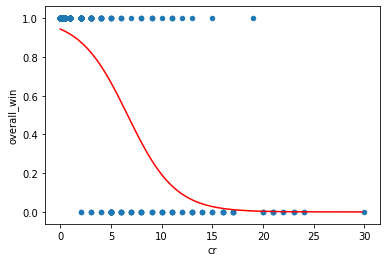

In [86]:
#Visualizations
level_one_data = level_one_results[['cr', 'overall_win']]
level_one_data.plot.scatter('cr', 'overall_win')

# plot the predicted probability:
plt.plot(np.arange(0,30, .25), level_one_model.predict_proba(np.arange(0,30,.25).reshape(-1,1))[:,1], color = 'red')